# CORDIC Algorithm
**CO**ordinate **R**otation **DI**gital **C**omputer (CORDIC) is an algorithm which uses rotation of vector to calculate trignometric and hyperbolic functions. CORDIC algorithms as in present forms were first described by Volder in 1959 in his paper *The CORDIC Trigonometric Computing Technique*. They were first developed to replace analog resolver in B-58 bombers with digital solution.

## Contents

* Working
* Basics of CORDIC algorithm
* Modes of CORDIC algorithm
    * Rotation mode
    * Vector mode
* Imports and global declarations
* Python implementation of **rotation mode**
    * Calculations of rotation mode
        * Plot of $x_i$
        * Plot of $y_i$
        * Plot of $z_i$
* Python implementation of **vector mode**
    * Calculations of vector mode
        * Plot of $x_i$
        * Plot of $y_i$
        * Plot of $z_i$
* Pre-calculated results
* Python implementation of  different different algorithms for CORDIC Processor.
    * **Higher Radix** Cordic Algorithm.
    
    * **Angle Recoding(AR)** Methods:
        * (a) Elementary-Angle-Set Recoding.
        * (b) Extended Elementary-Angle-Set Recoding.
        * (c) Parallel Angle Recoding.
    
    * **Hybrid or Coarse-Fine Rotation** CORDIC:
        * (a) Coarse–Fine Angular Decomposition.
        * (b) Implementation of Hybrid CORDIC.
        * (c) Shift-Add Implementation of Coarse Rotation.
        * (d) Parallel CORDIC Based on Coarse-Fine Decomposition.

    * **Redundant-Number-Based** CORDIC.
    * **Pipelined** CORDIC Architecture.
    * **Differential** CORDIC Algorithm.

* Notes
* References

## Working

CORDIC algorithms works on the principle of rotation of vector. CORDIC algrithms are based on the fact that rotation of a vector in eucledian space are dependent on **sine** and **cosine** of rotation angle. Based on this CORDIC algorithms usually works by rotating vector similar to a damping motion of a pendulumn till it reaches desired angular value (usually $0^o$).

Since CORDIC algorithms operate in different modes and coordinate systems to produce different results, it is easier to analyse their behaviour separetly. 

Generally CORDIC algorithms are classified into two mode of operation:
1. Rotation Mode
2. Vector Mode

## Basics of CORDIC algorithm

CORDIC algorithms exploit the fact that on rotation of a vector ((0, 0)$\rightarrow$ (x, y)) by $\theta^o$ new co-ordinates of a vector are:

\begin{equation}
    x' = x\cos(\phi) - y\sin(\phi)
\end{equation}
\begin{equation}
    y' = x\sin(\phi) + y\cos(\phi)
\end{equation}

Using basic trignometric identies these equations can be shown to be equivalent to:

\begin{equation}
    x' = A\cdot(x - y\tan(\phi))
\end{equation}
\begin{equation}
    y' = A\cdot(x\tan(\phi) + y)
\end{equation}

\begin{equation}
A = \frac{1}{\sqrt{1+\tan^2(\phi)}}
\end{equation}
\begin{equation}...[Eq 1.1]
\end{equation}

These equations can be seperated into two parts, A which scales the magnitude of vector and rest of the part which performs vector rotation. If we get rid of A these set of equations will perform psuedo rotations.

If instead of single $-\theta^\circ$ rotation vector are rotated through multiple angles which sums to $-\theta^\circ$. 

In current form these equations require multipliers but if we restrict each of the iteration to an angle such that $\tan{(\phi_i)} = 2^{-i}$. In iterative form equations now are:

\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


One thing that is worth noticing is for increase in value of i, decrease in value of $tan^{-1}(2^{-i})$ is less than half of $tan^{-1}(2^{-(i-1)})$. Or mathematically:

\begin{equation}
tan^{-1}(2^{-(i)}) \geq \frac{1}{2} tan^{-1}(2^{-(i+1)})
\end{equation}

This is very important for convergence of value in either of the mode, if value of does not convergence in specific case we'll have to repeat certain iterations to get convergence.

# Modes of CORDIC Algorithms
CORDIC algorithms is usualy operated in one of the following two modes:
* **Rotation mode** 
* **Vector mode**


## Rotation Mode
Instead of performing rotation by an angle in one go, multiple small rotations are performed over number of iterations. After each iteration total sum of rotation is equal to the desired angle. 
In rotation mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in rotation mode are:

\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}

\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}

\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

here Z is also known as angle accumulator since at the end of iterations Z accumulates all the rotations performed

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then

\begin{equation}
    x_{n} = A_{n} \cdot [ x_{0} \cdot cos z_{0} - y_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    y_{n} = A_{n} \cdot [ y_{0} \cdot cos z_{0} + x_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    z_{n} = 0
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

Equations used above are for circular coordinate system for rest of the co-ordinate system results are summarised in the table below:

\begin{array}{|l|l|l|l|l|l|l|}
\hline 
Coordinate~System & x_{in} & y_{in} & z_{in} & x_{out}    & y_{out}    & z_{out} \\ \hline
Linear            & x      & 0      & z      & x          & x*z        & 0       \\ \hline
Circular          & 0.6073 & 0      & z      & \cos{(z)}  & \sin{(z)}   & 0       \\ \hline
Hyperbolic        & 1.2075 & 0      & z      & \cosh{(z)} & \sinh{(z)} & 0       \\ \hline
\end{array}

## Imports and global declarations

General import statements, we'll use matplotlib to plot graphs

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import math
import string
import struct

from __future__ import division

Variables to identify circular, linear and hyperbolic mode

In [2]:
circular = 1
linear = 0
hyperbolic = -1

Method to plot values

In [3]:
def plot(x_values, y_values, x_label, y_label, plot_label):
    # Plot of Value of gain with number of iterations
    fig = plt.figure();
    ax = fig.add_subplot(111);

    line, = ax.plot(x_values, y_values,  lw=2)

    ax.set_title(plot_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()
    plt.close()
    return

### Value of $A_{n}$ as $n \rightarrow \infty$

Calculation of system gain ($A_n$) for circular co-ordinate system these calculation can be extended to other co-ordinate system with slight modification.

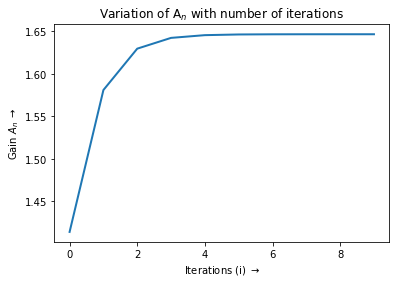

Gain of the system is 1.6467592111398222


In [4]:
gain_val_list = [math.sqrt(2)]  # Stores value of gain after each iteration 
max_iter_gain = 10              # Max number of iterations for calculating value of gain
iterations_list = [0]           # List that Stores the number of iterations performed

for i in range (1, max_iter_gain):
    gain_val_list.append(gain_val_list[i-1] * math.sqrt(1 + 2**(-2 * i)))
    iterations_list.append(i)

# Plot for value of gain with each iteration
plot(iterations_list, gain_val_list, 'Iterations (i) $\\rightarrow$', 'Gain $A_{n}$ $\\rightarrow$',
     'Variation of A$_{n}$ with number of iterations')
print("Gain of the system is " + str(gain_val_list[len(gain_val_list) - 1]))

As evident from the plot above $A_{n} \approx 1.647$ as $n \rightarrow \infty$. $A_{n}$ is also refered as the gain of the system.

## Python implementation of Rotation mode

Returns dictionary containing one list for each x, y, z and iterations 

`ROM_lookup` provides values of constant required for each coordinate system based on iteration count

In [5]:
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return math.degrees(math.atan(2**(-1*iteration)))
    elif (coordinate == linear):
        return 2**(-1*iteration)
    elif (coordinate == hyperbolic):
        return (math.atanh(2**(-1*iteration)))

`Rotation_mode` returns dictionary of list containing x, y and z values for each iteration

In [6]:
def rotation_mode(x, y, z, coordinate, iterations):
    a = 0.607252935;   # = 1/K
    
    x_val_list = []
    y_val_list = []
    z_val_list = []
    iterations_list = []

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration
    
    di = 0
    
    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < iterations):
            if (current_z < 0):
                di = -1
            else:
                di = +1
            next_z = current_z - di * ROM_lookup(i, coordinate)
            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)
            
            current_x = next_x
            current_y = next_y
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)
            
            iterations_list.append(i)
            
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list, }

Next parameters given to `rotation_mode` are specified to get corresponding results, here *Circular mode* is used so the results are $x=\cos(\theta)$, $y=\sin(\theta)$ and $z=0$.

## Calculation of Rotation mode

Change these values to calculate plot for different angles 

In [43]:
rot_x = 0.2
rot_y = 0.1
rot_z = 0.15
crd_sys = linear
rot_max_iter = 20
rot_max_iter1 = 10

In [63]:
result_dict = rotation_mode(rot_x, rot_y, rot_z, crd_sys, rot_max_iter)
result_dict1 = rotation_mode(4, 5 ,3, circular, rot_max_iter1)

### Plot of $x_i$

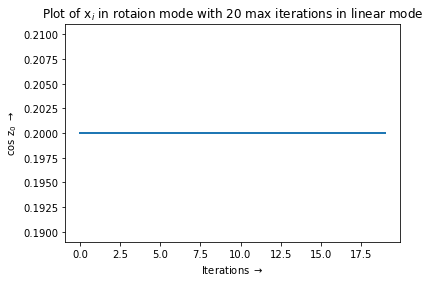

Xn = 0.2


In [75]:
plot(result_dict['iteration'], result_dict['x'], 'Iterations $\\rightarrow$', 'cos z$_{0}$ $\\rightarrow$', 'Plot of x$_{i}$ in rotaion mode with 20 max iterations in linear mode')
print("Xn = " + str(result_dict['x'][rot_max_iter-1]))

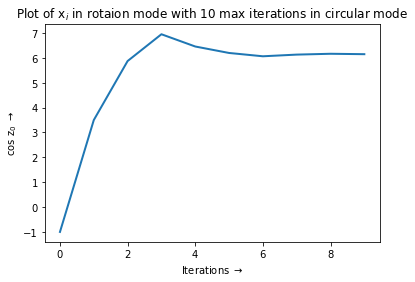

Xn = 6.150735532536231


In [76]:
plot(result_dict1['iteration'], result_dict1['x'], 'Iterations $\\rightarrow$', 'cos z$_{0}$ $\\rightarrow$', 'Plot of x$_{i}$ in rotaion mode with 10 max iterations in circular mode')
print("Xn = " + str(result_dict1['x'][rot_max_iter1-1]))

### Plot of $y_i$

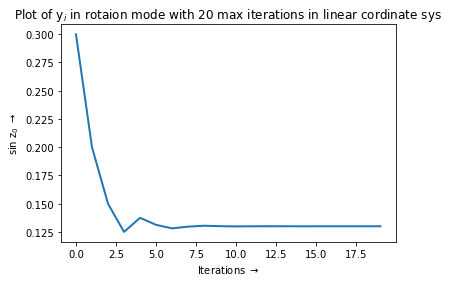

Yn = 0.12999992370605476


In [79]:
plot(result_dict['iteration'], result_dict['y'], 'Iterations $\\rightarrow$', 'sin z$_{0}$ $\\rightarrow$', 'Plot of y$_{i}$ in rotaion mode with 20 max iterations in linear cordinate sys')
print("Yn = " + str(result_dict['y'][rot_max_iter-1]))

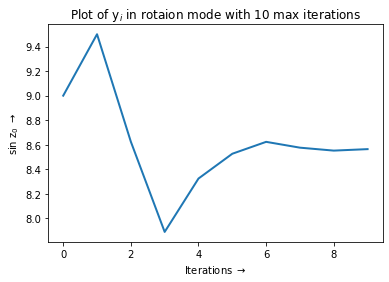

Yn = 8.564631007067618


In [70]:
plot(result_dict1['iteration'], result_dict1['y'], 'Iterations $\\rightarrow$', 'sin z$_{0}$ $\\rightarrow$', 'Plot of y$_{i}$ in rotaion mode with 10 max iterations')
print("Yn = " + str(result_dict1['y'][rot_max_iter1-1]))

### Plot of $z_i$

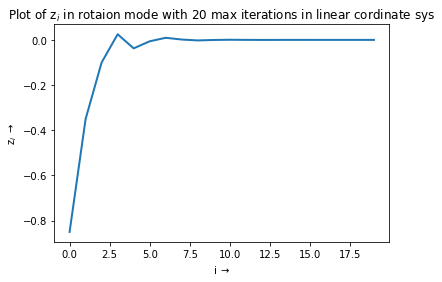

Zn = 3.8146972658470446e-07


In [78]:
plot(result_dict['iteration'], result_dict['z'], 'i $\\rightarrow$', 'z$_{i}$ $\\rightarrow$', 'Plot of z$_{i}$ in rotaion mode with 20 max iterations in linear cordinate sys')
print("Zn = " + str(result_dict['z'][rot_max_iter-1]))

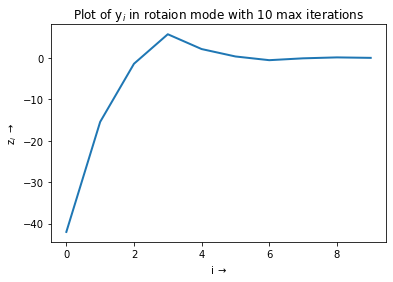

Zn = 0.02441129461465584


In [72]:
plot(result_dict1['iteration'], result_dict1['z'], 'i $\\rightarrow$', 'z$_{i}$ $\\rightarrow$', 'Plot of y$_{i}$ in rotaion mode with 10 max iterations')
print("Zn = " + str(result_dict1['z'][rot_max_iter1-1]))

In [73]:
result_dict

{'x': [0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2],
 'y': [0.30000000000000004,
  0.20000000000000004,
  0.15000000000000002,
  0.12500000000000003,
  0.13750000000000004,
  0.13125000000000003,
  0.12812500000000004,
  0.12968750000000004,
  0.13046875000000005,
  0.13007812500000004,
  0.12988281250000006,
  0.12998046875000005,
  0.13002929687500006,
  0.13000488281250006,
  0.12999267578125007,
  0.12999877929687506,
  0.13000183105468757,
  0.13000030517578132,
  0.1299995422363282,
  0.12999992370605476],
 'z': [-0.85,
  -0.35,
  -0.09999999999999998,
  0.025000000000000022,
  -0.03749999999999998,
  -0.006249999999999978,
  0.009375000000000022,
  0.0015625000000000222,
  -0.002343749999999978,
  -0.0003906249999999778,
  0.0005859375000000222,
  9.76562500000222e-05,
  -0.0001464843749999778,
  -2.4414062499977796e-05,
  3.6621093750022204e-05,
  6.1035156250222045e-06,
  -9.1552734374

In [74]:
result_dict1

{'x': [-1,
  3.5,
  5.875,
  6.953125,
  6.4599609375,
  6.199798583984375,
  6.066563129425049,
  6.133937668055296,
  6.167439800556167,
  6.150735532536231],
 'y': [9,
  9.5,
  8.625,
  7.890625,
  8.3251953125,
  8.527069091796875,
  8.62394094467163,
  8.576545920222998,
  8.552585226207157,
  8.564631007067618],
 'z': [-42.0,
  -15.43494882292201,
  -1.3987053549955313,
  5.726310993906266,
  2.1499766189089153,
  0.36006601066284594,
  -0.5351076995482285,
  -0.08749352868767535,
  0.13631697168086274,
  0.02441129461465584],
 'iteration': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

# Python implementation of vector mode
In vector mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in vector mode are (same as rotation mode):


\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then


\begin{equation}
    x_{n} = A_{n} \sqrt{ x_{0}^{2} - y_{0}^{2} }
\end{equation}

\begin{equation}
    y_{n} = 0
\end{equation}

\begin{equation}
    z_{n} = z_{0} + tanh^{-1}( \dfrac{y_{0}}{x_{0}} )
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

In [13]:
def vector_mode(x, y, z, coordinate, iterations):
    a = 1.2075;   # = 1/K
    
    x_val_list = []
    y_val_list = []
    z_val_list = []
    iterations_list = []

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration
    
    di = 0
    
    # This is neccesary since result for i=0 doesn't exists for hyperbolic 
    # co-ordinate system.
    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < iterations):
            di = -1*math.copysign(1, current_y);#*current_x);
            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)
            next_z = current_z - di * ROM_lookup(i, coordinate)
            
            current_x = next_x
            current_y = next_y
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)
            
            iterations_list.append(i)
            
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list }

> **NOTE:** Method used here to calculate decision vector ($d_i$) is based on modified technique of what was mentioned originally in *Andraka, Ray (1998)* paper on CORDIC algorithms[1]. Here $d_i~=~x_i \cdot y_i$ instead of $d_i~=~y_i$. This allows greater range values and allows convergence of algorithm in case of $x_{o} < y_{o}$.

## Calculations of vector mode

Change these values to calculate plot for different values 

In [14]:
vect_x = 2
vect_y = 1
vect_z = 1.5
crd_sys = linear
max_iter = 20
max_iter1 = 15

In [15]:
result_dict_vect = vector_mode(vect_x, vect_y, vect_z, crd_sys, max_iter)
result_dict_vect1 = vector_mode(5, 4, 5.3, linear, max_iter1)

### Plot of $x_i$

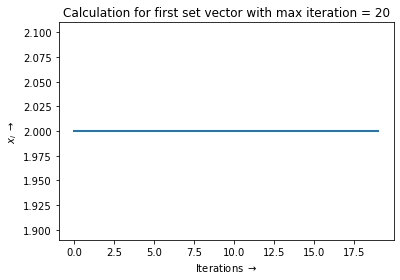

Xn = 2.0


In [16]:
plot(result_dict_vect['iteration'], result_dict_vect['x'], 'Iterations $\\rightarrow$', '$x_i$ $\\rightarrow$', 'Calculation for first set vector with max iteration = 20')
print("Xn = " + str(result_dict_vect['x'][max_iter-1]))

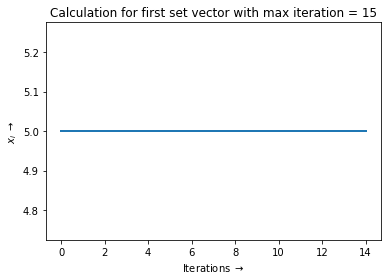

Xn = 5.0


In [17]:
plot(result_dict_vect1['iteration'], result_dict_vect1['x'], 'Iterations $\\rightarrow$', '$x_i$ $\\rightarrow$', 'Calculation for first set vector with max iteration = 15')
print("Xn = " + str(result_dict_vect1['x'][max_iter1-1]))

### Plot of $y_i$

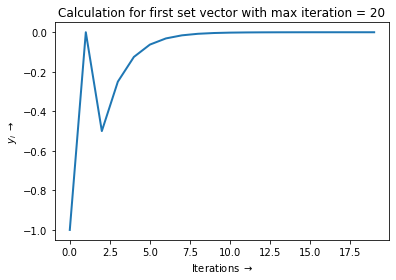

Yn = -3.814697265625e-06


In [18]:
plot(result_dict_vect['iteration'], result_dict_vect['y'], 'Iterations $\\rightarrow$', '$y_i$ $\\rightarrow$', 'Calculation for first set vector with max iteration = 20')
print("Yn = " + str(result_dict_vect['y'][max_iter-1]))

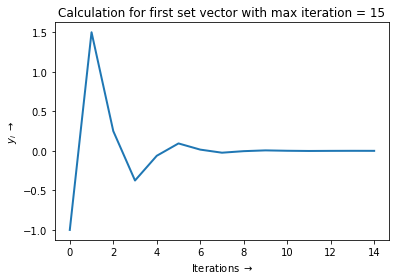

Yn = 6.103515625e-05


In [19]:
plot(result_dict_vect1['iteration'], result_dict_vect1['y'], 'Iterations $\\rightarrow$', '$y_i$ $\\rightarrow$', 'Calculation for first set vector with max iteration = 15')
print("Yn = " + str(result_dict_vect1['y'][max_iter1-1]))

### Plot of $z_i$

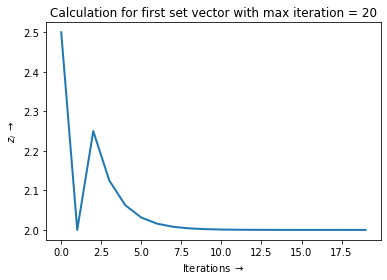

Zn = 2.000001907348633


In [20]:
plot(result_dict_vect['iteration'], result_dict_vect['z'], 'Iterations $\\rightarrow$', '$z_i$ $\\rightarrow$', 'Calculation for first set vector with max iteration = 20')
print("Zn = " + str(result_dict_vect['z'][max_iter-1]))

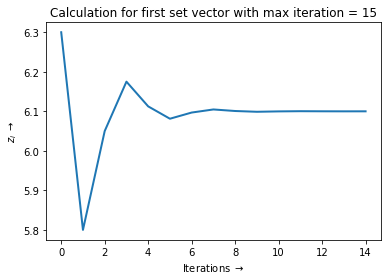

Zn = 2.00006103515625


In [21]:
plot(result_dict_vect1['iteration'], result_dict_vect1['z'], 'Iterations $\\rightarrow$', '$z_i$ $\\rightarrow$', 'Calculation for first set vector with max iteration = 15')
print("Zn = " + str(result_dict_vect['z'][max_iter1-1]))

## Precalculated results
Results presented in this section are without the script that generated these

Variation of X and error bit with iteration for initial values $x_0=0.6073$, $y_0=0$ & $z_0=60^{\circ}$. With each iteration most significant bit with error in difference of expected value and output of algorithm was noted. Note that the error bit was calculated after converting output to fixed point un- signed binary number.

This graph represents typical convergence of algorithm which is about 1 bit per iteration.

### To handle latency bottlenecks, various techniques have been developed and reported in the literature. Most of the well known algorithms could be grouped under, high-radix
CORDIC, the angle-recoding method, hybrid micro-rotation
scheme, redundant CORDIC and differential CORDIC which
we discuss briefly in the following subsections.

# Algorithm 2: Python implementation of Higher Radix Cordic Algorithm
In vector mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in Higher Radix Cordic are:


\begin{equation}
    x_{i+1} = x_{i} - \sigma_{i} \cdot 4^{-i} \cdot y_{i}     
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + \sigma_{i} \cdot 4^{-i} \cdot x_{i} 
\end{equation}

\begin{equation}
    \omega_{i+1} = \omega_{i} - \sigma_{i} \cdot \alpha_{i}     
\end{equation}


\begin{equation}
^{(where \space \sigma_{i} \in \space \{-2, -1, 0, 1, 2\})}
\end{equation}

elementary angles
\begin{equation}
\alpha_{i} = arctan(\sigma_{i}4^{-i})
\end{equation}





where the scale factor for the ith iteration

\begin{equation}
    K_{n} = {\displaystyle 1/ \prod_{i=0} ^{n}} \sqrt{1+ \sigma_{i}^2 \cdot 4^{-2i}}
\end{equation}

In [22]:
# A full radix-4 CORDIC algorithm in rotation mode and circular coordinates
#to do: find how to utilise the set of sigma_i values?
def HigerRadixCordicRotationMode(x, y, omega, coordinate_system, iterations):
   # a = 1.2075;   # = 1/K


    
    x_val_list = []
    y_val_list = []
    omega_val_list = []
    iterations_list = []
    alpha_i_list = []
    sigma_i_list = []

    i = 0;                  # Keeps count on number of iterations
    
    alpha_i = arctan(cuurent_sigma * 4 **(-i))
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_omega = omega         # Value of Z on ith iteration
    current_sigma = sigma   # denote the /sigma_{i}  sigma lies in {-2,-1,0,1,2}
    
    sigma_i = 0
    
    # This is neccesary since result for i=0 doesn't exists for hyperbolic 
    # co-ordinate system.
    if (coordinate_system == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < iterations):
            #di = -1*math.copysign(1, current_y);#*current_x);
            #sigma_i = 
            
            next_x = current_x - current_sigma * 4**(-1*i) * current_y
            next_y = current_y + current_sigma * 4**(-1*i) * current_x 
            next_omega = current_omega - currernt_sigma * alpha_i
            
            current_x = next_x
            current_y = next_y
            current_omega = next_omega

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            omega_val_list.append(current_omega)
            
            iterations_list.append(i)
            
            if (coordinate_system == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'omega':omega_val_list, 'iteration':iterations_list }

# Algorithm 3: Python implementation of Angle Recoding (AR) Methods
### (a) Elementary-Angle-Set Recoding:
### (b) Extended Elementary-Angle-Set Recoding:
### (c) Parallel Angle Recoding:

## 

### (a) Elementary-Angle-Set Recoding

In [23]:
#AR methods
#Elementary-Angle-Set Recoding
# here di or sigma_i belongs to {-1,0,1} 0 is added in angle calculation expression.
#to do: find the di or sigma_i 0 value implement condition?


def AngleSetRecodingRotationMode(x, y, z, coordinate, iterations):
    a = 0.607252935;   # = 1/K
    
    x_val_list = []
    y_val_list = []
    z_val_list = []
    iterations_list = []

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration
    
    di = 0
    
    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < iterations):
            if (current_z < 0):
                di = -1
            else:
                di = +1
            next_z = current_z - di * ROM_lookup(i, coordinate)
            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)
            
            current_x = next_x
            current_y = next_y
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)
            
            iterations_list.append(i)
            
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list, }

In [80]:
def HuNaganathanAngleSetRecodingRotationMode(x, y, z, cordinate_sys, iterations):
    
    #initialization of theta(0)= 0, {sigma_{i} or u_{i};0<1<=n-1}, k=0
    theta_value_list = []
    u_i = 0
    k = 0
    
    #repeat until mod(theta(k)<a(n-1)) means loop {while(theta(k)< a(n-1))},or in tan form it is {while(theta(k)<math.atan(2**(-n+1)))}
    
    #do 1. chose i(k), 0<=i_{k} <= n-1 such that
    #mod(mod(theta_{k}) - a(i_{k})) = min{mod(mod(theta_{k}) - a(i))} theta<i<n-1
    # mod(mod(theta_{k})- math.atan(2**(-i_{k}))) == min(mod(mod(theta_{k})) - math.atan(2**(-i))) , for 0<= i <= n-1
    
    
    #2. theta(k+1) = theta(k)-u(i_{k})a(i_{k}), where u(i_{k}) = sign(theta_{k})
    # theta_{k+1} =   theta_{k} -  u_{i_{k}}math.atan(2**(-i_{k})), sigma_{i_{k}} or u_{i_{k}} = sign(theta_{k})
    #next_theta     current_theta                                                                     current_theta

# Algorithm 4: Python implementation of Hybrid or Coarse-Fine Rotation CORDIC
### (a)  Coarse–Fine Angular Decomposition: 
### (b) Implementation of Hybrid CORDIC:
### (c) Shift-Add Implementation of Coarse Rotation:
### (d) Parallel CORDIC Based on Coarse-Fine Decomposition:

# Algorithm 5: Python implementation of Redundant-Number-Based CORDIC Implementation

# Algorithm 6: Python implementation of Pipelined CORDIC Architecture

# Algorithm 7: Python implementation of Differential CORDIC Algorithm

## Notes

This is not exact python implmentation of Ray Andraka's paper, instead some of the errors have been rectified and some modification has been performed to extend range and produce correct results. These have been listed below:
* In linear co-ordinate system vectoring mode result is $z_n = z_0 + y_0/x_0$ instead of $z_n = z_0 - y_0/x_0$  as mentioned in the paper.
* Update rule for decision vector in vectoring mode is $d_i = x_i \cdot y_i$. On using this modification hyperbolic mode will output $x_n = A_n\sqrt{\left|x_0^2 - x_0^2\right|}$, $y_n = 0$ and $z_n = z_0 + \text{tanh}^{-1}(\frac{y_0}{x_0})$

# References
1. [*A survey of CORDIC algorithms for FPGA based computers*](http://portal.acm.org/citation.cfm?doid=275107.275139) by Andraka, Ray (1998).
2. *Cordic Architeutre - QIP STC-Image Processing using VLSI architecture* by Das, Bishnu Prasad (2016).
3. Wikibooks contributors, "[*Digital Circuits/CORDIC*](https://en.wikibooks.org/w/index.php?title=Digital_Circuits/CORDIC&oldid=3048211)," Wikibooks, The Free Textbook Project, (accessed
June 8, 2017). 